In [375]:
import numpy as np 
import pandas as pd

In [376]:
df = pd.read_csv("complete_student_analysis_dataset_deepak_sir - complete_student_analysis.csv")

In [377]:
df.head()         #it prints 5 values from the starting

,student_id,math_original,science_original,english_original,attendance,math_int8,attendance_float32,weighted_total,math_mean,science_mean,...,grade,bonus_points,final_score,math_original_zscore,science_original_zscore,english_original_zscore,math_original_percentile,science_original_percentile,english_original_percentile,overall_performance
0,1001,82.45,76.70,65.00,71,82,71,76.08,73.4422,79.4485,...,C,0,76.08,0.661,-0.238,-1.706,35.70,60.20,65.00,Needs Improvement
1,1002,72.93,68.88,65.30,90,72,90,69.60,73.4422,79.4485,...,D,0,69.60,-0.038,-0.917,-1.672,45.19,60.37,65.30,Needs Improvement
2,1003,84.72,64.79,65.61,99,84,99,72.97,73.4422,79.4485,...,C,0,72.97,0.828,-1.272,-1.637,45.60,60.66,65.61,Good
3,1004,97.85,73.50,65.91,70,97,70,81.34,73.4422,79.4485,...,B,0,81.34,1.792,-0.516,-1.603,46.30,61.48,65.91,Needs Improvement
4,1005,71.49,97.72,66.21,97,71,97,79.35,73.4422,79.4485,...,C,0,79.35,-0.143,1.585,-1.569,48.55,61.63,66.21,Good


In [378]:
math_score_array =  df['math_original'].to_numpy()
print("Math scores array :")
print(math_score_array)

Math scores array :
[ 82.45  72.93  84.72  97.85  71.49  71.49  98.69  86.51  67.96  83.14
  68.05  68.01  78.63  46.3   49.13  66.57  59.81  79.71  61.38  53.82
  96.98  71.61  76.01  53.63  66.83  76.66  57.74  80.64  65.99  70.62
  65.97 102.78  74.8   59.13  87.34  56.69  78.13  45.6   55.08  77.95
  86.08  77.57  73.27  70.48  52.82  64.2   68.09  90.86  80.15  48.55
  79.86  69.22  64.85  84.18  90.46  88.97  62.41  70.36  79.97  89.63
  67.81  72.22  58.4   57.06  87.19  95.34  73.92  90.05  80.42  65.32
  80.42  98.07  74.46  98.47  35.7   87.33  76.31  70.51  76.38  45.19
  71.7   80.36  97.17  67.23  62.87  67.47  88.73  79.93  67.05  82.7
  76.46  89.53  64.47  70.09  69.12  53.05  79.44  78.92  75.08  71.48]


In [379]:
# generate grade boundaries using linespace for science scores
science_scores = df["science_original"].to_numpy()  

# Define grade boundaries 
min_score = science_scores.min()
print("min:",min_score)
max_score = science_scores.max()
print("max:",max_score)

# Generate 6 boundaries 
grade_boundaries = np.linspace(min_score, max_score, num=5)
grade_boundaries

min: 60.2
max: 99.43


array([60.2   , 70.0075, 79.815 , 89.6225, 99.43  ])

In [380]:
# initialize digital attendance system with zero 
num_student = len(df)
attendance_system =  np.zeros(num_student,dtype=int)
attendance_system


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [381]:
# optimize memory usage for student performance grades
print(f"Original 'grade' dtype: {df['grade'].dtype}")
print("Before optimization memory usage: ")
print(df['grade'].memory_usage(deep=True))     #memory_usage - this consider all type of data       
df['grade'] = df['grade'].astype('category')
print(f"Optimized 'grade' dtype: {df['grade'].dtype}")
print("Memory usage after optimization: ")
print(df['grade'].memory_usage(deep=True))

Original 'grade' dtype: object
Before optimization memory usage: 
5132
Optimized 'grade' dtype: category
Memory usage after optimization: 
604


In [382]:
# optimize storage for math scores using different integer types
print(f"Original 'math_original' dtype {df['math_original'].dtype}")

# convert math_original -> int8(correct conversion)
df['math_int8_fixed'] = df['math_original'].astype(np.int8) 

# show corrected int8 dtype + memory 
print(f"'math_int8_fixed' dtype : {df['math_int8_fixed'].dtype}, "f"memory: {df['math_int8_fixed'].memory_usage(deep=True)}")

# convert attendance -> uint8 (correct)
df['attendance_uint8'] = df['attendance'].astype(np.uint8)
print(f"'attendance_uint8' dtype : {df['attendance_uint8'].dtype}, "f"memory: {df['attendance_uint8'].memory_usage(deep=True)}")



Original 'math_original' dtype float64
'math_int8_fixed' dtype : int8, memory: 232
'attendance_uint8' dtype : uint8, memory: 232


In [383]:
# expolore float precision with science_original scores 
print(f"Original 'science_original' dtype {df['science_original'].dtype}")
df['science_float16_fixed'] = df['science_original'].astype(np.float16) 
print(f"optimized 'science_float16_fixed' dtype {df['science_float16_fixed'].dtype}, "f"memory: {df['science_float16_fixed'].memory_usage(deep=True)}")




Original 'science_original' dtype float64
optimized 'science_float16_fixed' dtype float16, memory: 332


In [384]:
# optimize memory for attendance data
print(f"Original 'attendance_original' dtype {df['attendance'].dtype}")
df['attendance_uint8_fixed'] = df['attendance'].astype(np.uint8) 
print(f"optimized 'attendance_uint8_fixed' dtype {df['attendance_uint8_fixed'].dtype}, "f"memory: {df['attendance_uint8_fixed'].memory_usage(deep=True)}")



Original 'attendance_original' dtype int64
optimized 'attendance_uint8_fixed' dtype uint8, memory: 232


In [385]:
# compare math scores between different student groups 
math_score_by_grade = df.groupby('grade')['math_original'].mean()
print("Average math scores by grade : ")
print(math_score_by_grade)

Average math scores by grade : 
grade
A    95.667500
B    83.802424
C    70.445532
D    55.320625
Name: math_original, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_10408\3596769586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  math_score_by_grade = df.groupby('grade')['math_original'].mean()


In [386]:
# calculate average scores with custom weightsc
math_weight = 0.4
science_weight = 0.3
english_weight = 0.3 
df['custom_weight_score'] = (df['math_original']*math_weight+df['science_original']*science_weight+df['english_original']*english_weight)
print("First 5 custom weighted scores :")
print(df[['math_original','science_original','english_original','custom_weight_score']].head())



First 5 custom weighted scores :
   math_original  science_original  english_original  custom_weight_score
0          82.45             76.70             65.00               75.490
1          72.93             68.88             65.30               69.426
2          84.72             64.79             65.61               73.008
3          97.85             73.50             65.91               80.963
4          71.49             97.72             66.21               77.775


In [387]:
# compare attendance between different student groups 
average_attendance = df.groupby('grade')['attendance'].mean()
average_attendance 

C:\Users\HP\AppData\Local\Temp\ipykernel_10408\1773171307.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_attendance = df.groupby('grade')['attendance'].mean()


grade
A    91.000000
B    84.939394
C    82.957447
D    89.875000
Name: attendance, dtype: float64

In [388]:
# find class performance metrics from math_original scores 
math_min = df["math_original"].to_numpy().min() 
math_max = df["math_original"].to_numpy().max() 
math_mean = df["math_original"].to_numpy().mean() 
math_std = df["math_original"].to_numpy().std()  
print("min = ",math_min)
print("max = ",math_max)
print("mean = ",math_mean)
print("std = ",math_std)


min =  35.7
max =  102.78
mean =  73.44219999999999
std =  13.554287777673897


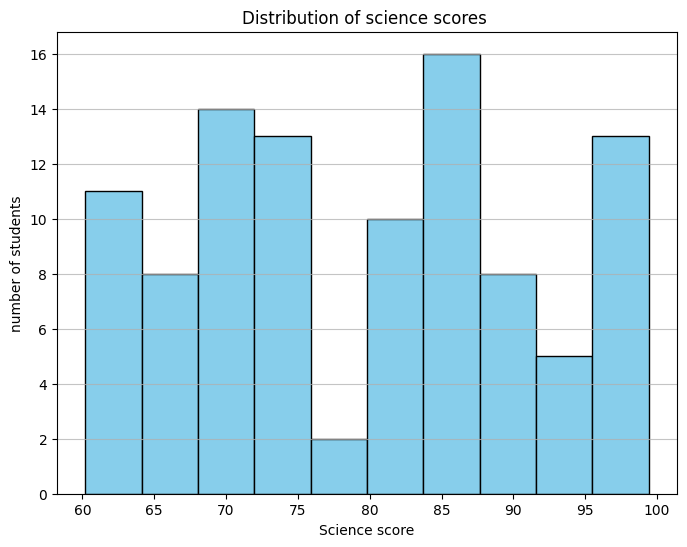

In [389]:
# analyze score distribution using science_original data
import matplotlib.pyplot as plt        #ploting library
plt.figure(figsize=(8,6))              #for drowing figures 8x6 size   
plt.hist(df['science_original'],bins=10,edgecolor="black",color="skyblue")      #bin divides whole data in 10 equal parts
plt.title("Distribution of science scores ")       
plt.xlabel("Science score")
plt.ylabel("number of students")          
plt.grid(axis='y',alpha=0.75)          #create a grid in y axis  
plt.show()      #this shows graph



In [390]:
# find top performers in english_original text 
top_performers_english = df.nlargest(5,'english_original')
print(print(top_performers_english['student_id']))


99    1100
98    1099
97    1098
96    1097
95    1096
Name: student_id, dtype: int64
None


In [391]:
# apply bonus points to math_original scores
bonus_point = 5 
df['math_with_bonus'] = df['math_original'] + bonus_point
print(df[['math_original','math_with_bonus']].head())

   math_original  math_with_bonus
0          82.45            87.45
1          72.93            77.93
2          84.72            89.72
3          97.85           102.85
4          71.49            76.49


In [392]:
# scale attendance data based on term weights.
# for 80%
df['scaled_attendance'] = df['attendance']*0.8
print(df[['attendance','scaled_attendance']].head())


   attendance  scaled_attendance
0          71               56.8
1          90               72.0
2          99               79.2
3          70               56.0
4          97               77.6


In [393]:
# normalize (Xnorm​=(​X−Xmin)/(Xmax​−Xmin)​​) science_original scores using brodcasting
x_max = df['science_original'].max()
x_min = df['science_original'].min()
df['science_normalized'] = (df['science_original'] - x_min) / (x_max - x_min)
print(df[['science_original','science_normalized']].head())

   science_original  science_normalized
0             76.70            0.420596
1             68.88            0.221259
2             64.79            0.117002
3             73.50            0.339026
4             97.72            0.956411


In [394]:
df.tail()                #it print 5 value at the end

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,student_id,math_original,science_original,english_original,attendance,math_int8,attendance_float32,weighted_total,math_mean,science_mean,...,english_original_percentile,overall_performance,math_int8_fixed,attendance_uint8,science_float16_fixed,attendance_uint8_fixed,custom_weight_score,math_with_bonus,scaled_attendance,science_normalized
95,1096,53.05,69.76,93.79,92,53,92,69.08,73.4422,79.4485,...,93.79,Needs Improvement,53,92,69.7500,92,70.285,58.05,73.6,0.243691
96,1097,79.44,98.92,94.09,91,79,91,89.92,73.4422,79.4485,...,94.09,Excellent,79,91,98.9375,91,89.679,84.44,72.8,0.987000
97,1098,78.92,75.72,94.39,88,78,88,81.67,73.4422,79.4485,...,94.39,Good,78,88,75.7500,88,82.601,83.92,70.4,0.395616
98,1099,75.08,95.68,94.70,94,75,94,87.20,73.4422,79.4485,...,94.70,Excellent,75,94,95.6875,94,87.146,80.08,75.2,0.904410
99,1100,71.48,85.25,95.00,95,71,95,82.18,73.4422,79.4485,...,95.00,Good,71,95,85.2500,95,82.667,76.48,76.0,0.638542


In [395]:
df = pd.read_csv("nyc_weather.csv")
df

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,1/1/2016,38,23,52,30.03,10,8.0,0,5,NaN,281
1,1/2/2016,36,18,46,30.02,10,7.0,0,3,NaN,275
2,1/3/2016,40,21,47,29.86,10,8.0,0,1,NaN,277
3,1/4/2016,25,9,44,30.05,10,9.0,0,3,NaN,345
4,1/5/2016,20,-3,41,30.57,10,5.0,0,0,NaN,333
5,1/6/2016,33,4,35,30.50,10,4.0,0,0,NaN,259
6,1/7/2016,39,11,33,30.28,10,2.0,0,3,NaN,293
7,1/8/2016,39,29,64,30.20,10,4.0,0,8,NaN,79
8,1/9/2016,44,38,77,30.16,9,8.0,T,8,Rain,76
9,1/10/2016,50,46,71,29.59,4,NaN,1.8,7,Rain,109


In [396]:
# get the maximum temparature
df['Temperature'].max()

np.int64(50)

In [397]:
# to know which day it rains
df['EST'][df['Events']=='Rain']

8      1/9/2016
9     1/10/2016
15    1/16/2016
26    1/27/2016
Name: EST, dtype: object

In [398]:
# average wind speed
df['WindSpeedMPH'].mean()

np.float64(6.892857142857143)